<a href="https://colab.research.google.com/github/s3rgi0xd/inteligencia-artificial-STR/blob/main/Perceptroniris.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Perceptrón:

Implementacion del algoritmo donde aprende dos clases (Setosa, Versicolor)

# Librerías



*   **Numpy** para operaciones con matrices y algebra lineal
*   **Pandas** para manipulacion de datos. (Para este se usa para cargar y procesar el conjunto de datos iris).
*   **Matplobit** visualización de datos





In [7]:
from IPython.display import Image

import numpy as np

class Preceptron(object):
  def __init__(self, eta=0.01, n_iter=50, random_state=1): # Changed random_states to random_state for consistency
    self.eta = eta
    self.n_iter = n_iter
    self.random_state = random_state # Changed random_states to random_state for consistency

Este contructor inicializa el perceptron con 3 parametros:



1.   eta: corresponde a la tasa de aprendizaje que controla se ajustan los pesos en cada paso
2.   n_iter: corresponde al número de iteraciones y epocas.
3.   random_state: nos va a garantizar la reproducibilidad, inicializa los pesos de manera aleatoria.



In [8]:
  def fit(self, X, y): # Indented this method within the class
    rgen = np.random.RandomState(self.random_state) # Changed self.random_states to self.random_state for consistency
    self.w_ = rgen.normal(loc=0.0, scale=0.01, size=1 + X.shape[1])
    self.cost_ = []

    for i in range(self.n_iter):
      error =0
      for xi, target in zip(X, y): # Changed x to X
        update = self.eta * (target - self.predict(xi))
        self.w_[1:] += update * xi
        self.w_[0] += update
        error += int(update != 0.0)
      self.cost_.append(error)
    return self

**Método FIT:** ajusta los datos de entrenamiento. La varibale X es la matriz de caracteristicas con Y son susetiquetas correspondientes.

**self.w**_ se inicializa los pesos aleatoriamente. En el vector w_ se incluye un peso adicional para el sesgo en la posición w_[0].

**update, self.w_[1]:, self.w_[0:]:** evalua si la prediccion no coincidecon un valor real, se ajusta los pesos de forma proporcional entre la prediccion y su valor del objetivo [xi] multiplicando por la taza de aprendizaje, y los errores se almacenan en lista de errores_ para cada época

In [9]:
  def net_input(self, X): # Indented this method within the class
    return np.dot(X, self.w_[1:]) + self.w_[0]

  def predict(self, X): # Indented this method within the class
    return np.where(self.net_input(X) >= 0.0, 1, -1)

**MÉTODOS AUXILIARES**



*   Net_input: este calcula la suma ponderada de la entradas y los pesos.
*   Predict: devuelve la prediccion de la clase(-1 o 1) aplicando la funcion de activación.



In [10]:
v1 = np.array([1, 2, 3])
v2 = 0.5 * v1

np.arccos(v2.dot(v1) / (np.linalg.norm(v1) * np.linalg.norm(v2)))

import pandas as pd

df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', header=None)
df.tail()

,0,1,2,3,4
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


Calcula el angulo en radianes entre dos vectores v1 y v2 usando el coseno del ángulo.

dif carga el conjunto de datos lris que contiene 150 ejemplos de tres especies de iris (setosa, versicolor, virginica), para este ejemplo solo se toman 100 (50 setosa y 50 versicolor)

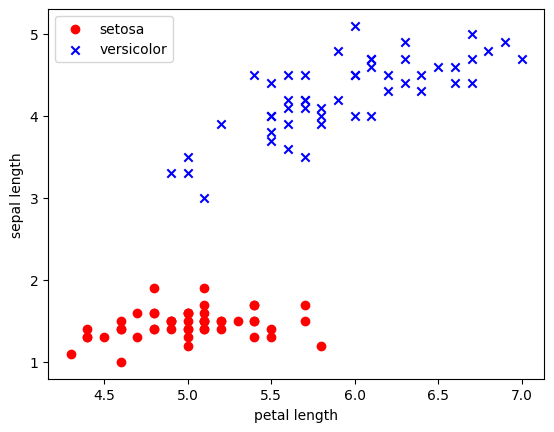

In [11]:
import matplotlib.pyplot as plt
import numpy as np

y = df.iloc[0:100, 4].values
y = np.where(y == 'Iris-setosa', -1, 1)

#extraer longitud sipalo y pitalo
X = df.iloc[0:100, [0, 2]].values

#Representar los datos de forma grafica
plt.scatter(X[:50, 0], X[:50, 1],
            color='red', marker='o', label='setosa')
plt.scatter(X[50:100, 0], X[50:100, 1],
            color='blue', marker='x', label='versicolor')

plt.xlabel('petal length')
plt.ylabel('sepal length')
plt.legend(loc='upper left')


plt.show()

In [12]:
# ### Entrenar el modelo de perceptrón
ppn = Preceptron(eta=0.1, n_iter=10)
ppn.fit(X, y)

plt.plot(range(1, len(ppn.cost_) + 1), ppn.cost_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of updates')

plt.show()

AttributeError: 'Preceptron' object has no attribute 'fit'